### Определение закономерностей успешности игр
___
##### Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
___
###### Данное исследование разделим на несколько шагов. 

#### Шаг 1. Изучение общей информации: 
* [1. Загрузка библиотек, открытие и сохранение файла](#1-bullet)
* [2. Получение и рассмотрение общей информации о таблице](#2-bullet)

#### Шаг 2. Подготовка даных:
* [1. Преобразование названий столбцов](#4-bullet)
* [2. Нахождение и ликвидация пропусков](#5-bullet)
* [3. Преобразование данных в нужные типы](#6-bullet)
* [4. Подсчет суммарных продаж во всех регионах](#7-bullet)

#### Шаг 3. Исследовательский анализ данных:
* [1. Изучение выпуска количества игр в разные годы](#8-bullet)
* [2. Как менялись продажи по платформам в зависимости от года?](#9-bullet)
* [3. Рассмотрение выбранного актуального периода](#10-bullet)
* [4. Изучение глобальных продаж игр в разбивке по платформам](#11-bullet)
* [5. Изучение влияния отзывов критиков и пользователей на продажи](#12-bullet)
* [6. Общее распределение игр по жанрам](#13-bullet)

#### Шаг 4. Портрет пользователя каждого региона:
* [1. Самые популярные платформы (топ-5)](#14-bullet)
* [2. Самые популярные жанры (топ-5)](#15-bullet)
* [3. Влияние рейтинга ESRB на продажи в регионе](#16-bullet)

#### Шаг 5. Проверка гипотез:
* [1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#17-bullet)
* [2. Средние пользовательские рейтинги жанров Action и Sports разные](#18-bullet)

#### Шаг 6. Общий вывод:
* [1. Общий вывод](#19-bullet)

### Шаг 1. Откроем файлы с данными и изучим общую информацию

<a id='1-bullet'></a>

In [1]:
# импортируем необходимые библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

# открываем и сохраняем файлы
data = pd.read_csv('/datasets/games.csv', sep=',')

<a id='2-bullet'></a>

In [2]:
# рассмотрим общую информацию о таблице games
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В таблице `data` представлена информация о играх. 
  
Столбцы:  
 - **Name** — название игры
 - **Platform** — платформа
 - **Year_of_Release** — год выпуска
 - **Genre** — жанр игры
 - **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
 - **EU_sales** — продажи в Европе (миллионы проданных копий)
 - **JP_sales** — продажи в Японии (миллионы проданных копий)
 - **Other_sales** — продажи в других странах (миллионы проданных копий)
 - **Critic_Score** — оценка критиков (максимум 100)
 - **User_Score** — оценка пользователей (максимум 10)
 - **Rating** — рейтинг от организации ESRB 

### Шаг 2. Предобработка данных

<a id='4-bullet'></a>
#### Сделаем названия столбцов строчными

In [3]:
data.columns = data.columns.str.lower() 

<a id='5-bullet'></a>
#### Обработаем пропущенные значения

In [4]:
# напишем функцию, которая считает долю пропущенных значений в столбце
def check_na(column):
    try:
        return print(column, 'Пропущено {:.1%}'.format(data[column].isna().value_counts()[1]/len(data)),'значений')
    except:
        return print(column, 'Пропущенных значений нет')

# посчитаем на доли пропущенных значений в каждом столбце:    
for row in list(data):
    check_na(row)
    print()

name Пропущено 0.0% значений

platform Пропущенных значений нет

year_of_release Пропущено 1.6% значений

genre Пропущено 0.0% значений

na_sales Пропущенных значений нет

eu_sales Пропущенных значений нет

jp_sales Пропущенных значений нет

other_sales Пропущенных значений нет

critic_score Пропущено 51.3% значений

user_score Пропущено 40.1% значений

rating Пропущено 40.5% значений



В **6 столбцах** имеются пропущенные значения.  
В столбцах `name` и `genre` пропущено несколько строк, поэтому их можно просто удалить.  
Столбец `year_of_release` не возможно заполнить на основе каких-либо расчетных значений. Удалим строки с пропущенными данными, так как таких строк достаточно мало (1,6%), мы не потеряем много информации.    
Столбцы `critic_score`, `user_score` и `rating` также невозможно заполнить на основе расчетных значений. Возможная причина пропусков, что эти игры вообще не оценивали и не давали рейтинг. Например, если они выходили давно. Заменим пропущенные значения в этих столбцах, а также аббревиатуру *tbd* (to be determined, подлежит определению с англ.) на число-маркер. Например, -1.

In [5]:
# удалим пропущенные строки в столбце с названием игры (name)
data.dropna(subset=['name'], inplace=True)

In [6]:
# удалим пропущенные строки в столбце с годом выпуска игры (year_of_release)
data.dropna(subset=['year_of_release'], inplace=True)

In [7]:
# заменим пропуски в столбцах critic_score, user_score и rating на число-маркер
for column in ['critic_score', 'user_score', 'rating']:
    data.loc[data[column].isna(), column] = -1

In [8]:
# заменим аббревиатуру "tbd" в user_score на число-маркер
data.loc[data['user_score']=='tbd', 'user_score'] = -1

<a id='6-bullet'></a>
#### Заменим типы данных

In [9]:
# посмотрим на текущие типы данных в столбцах
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [10]:
# заменим на целочисленный тип значений
data['year_of_release'] = data['year_of_release'].astype('int')

# заменим на вещественный тип значений
data['user_score'] = pd.to_numeric(data['user_score'])

<a id='7-bullet'></a>
#### Посчитаем суммарные продажи во всех регионах

In [11]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

### Шаг 3. Исследовательский анализ данных

<a id='8-bullet'></a>
#### Посмотрим сколько игр выпускалось в разные годы

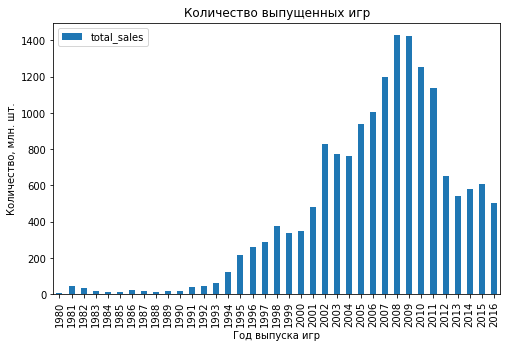

In [12]:
# строим график выхода игр по годам
(data
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
    .plot(figsize=(8,5), kind='bar')
)
plt.title('Количество выпущенных игр')
plt.xlabel('Год выпуска игр')
plt.ylabel('Количество, млн. шт.')
plt.show()

Если посмотреть на график, то можно заметить, что **до 1995г**. вышло очень мало игр, поэтому скорее всего эти данные будут не так интересны нам в дальнейшем анализе.

<a id='9-bullet'></a>
#### Посмотрим как менялись продажи по платформам в зависимости от года

Для начала посмотрим сколько в среднем лет на каждую игровую платформу продаются игры. Иными словами сколько в среднем живет платформа.

In [13]:
# найдем объем продаж игр для каждой платформы по годам
timeseries = data.pivot_table(index='year_of_release', columns='platform',values='total_sales', aggfunc='sum')
timeseries.fillna(0, inplace=True)

In [14]:
# создазим список из количества жизни лет каждой платформы - количество лет, когда были хоть какие-либо продажи игр 
notnull=[]
for platform in timeseries.columns:
    notnull.append((timeseries[platform]!= 0).sum())

In [15]:
# переведем список в датафрейм
notnull = pd.DataFrame(notnull)

# посчитаем характерные значения для жизни платформ
notnull.describe()

,0
count,31.000000
mean,7.677419
std,5.081910
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,26.000000


Итак, **средняя продолжительность жизни игровой платформы**, в течение которой она приносит какие-либо деньги, составляет **8 лет**  
  
Далее, найдем ТОП-10 платформ с наибольшими продажами и посмотрим как они распределялись по годам 

In [16]:
# создадим список ТОП-10 платформ с наибольшими продажами за всё время
top_platforms = (data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False).head(10))

top_platforms = top_platforms.reset_index()
top_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Как можно заметить в лидерах **PS2, Xbox 360 и PS3**

In [17]:
# добавляем булевый столбец принадлежности к ТОП-10 платформ
data['top_platform']=data['platform'].isin(top_platforms['platform'])

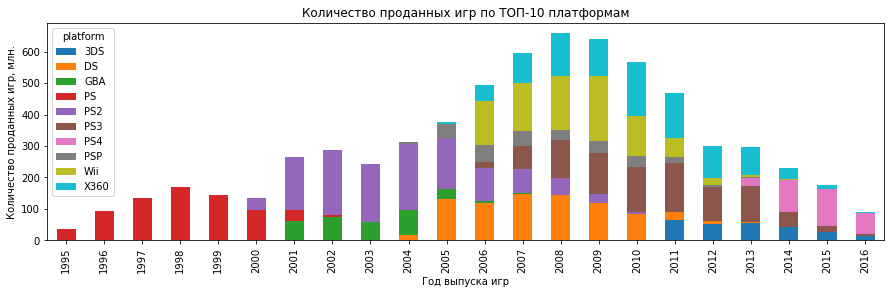

In [18]:
# построим график как распределяются продажи по ТОП-10 платформам, начиная с 1995г.
(data
    .query('(top_platform == True) and (year_of_release>=1995)')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(15,4), kind='bar', stacked=True)
)
plt.title('Количество проданных игр по ТОП-10 платформам')
plt.xlabel('Год выпуска игр')
plt.ylabel('Количество проданных игр, млн.')
plt.show()

Ранее мы выяснили, что в среднем консоли живут около 8 лет, поэтому **в качестве актуального периода возьмем данные с 2013 по 2016гг**. Это период, когда новое поколение консолей (например, PS4) как раз находится в середине своей жизни, пока другие консоли наоборот уже в конце своего жизненного цикла.  

<a id='10-bullet'></a>
#### Рассмотрим подробнее выбранный период с 2013г. по 2016г.

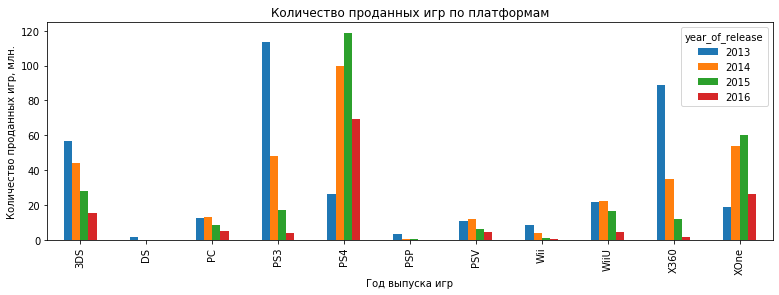

In [19]:
# построим график как распределяются продажи по платформам, начиная с 2003г.
(data
    .query('year_of_release>=2013')
    .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
    .plot(figsize=(13,4), kind='bar')
)
plt.title('Количество проданных игр по платформам')
plt.xlabel('Год выпуска игр')
plt.ylabel('Количество проданных игр, млн.')
plt.show()

Как было сказано ранее, в качестве актуального периода был выбран период последнего поколения консолей. PS4 и XOne находятся в своей активной коммерческой фазе и имеют самые большие продажи в 2016г., в то время как лидеры 2013г. PS3 и X360 продаются значительно реже. 

<a id='11-bullet'></a>
#### Рассмотрим глобальные продажи игр в разбивке по платформам.

In [20]:
# отфильтруем данные до 2013г.
actual_data = data.query('year_of_release>=2013')

In [21]:
# построим таблицу с общим и медианным количеством проданных игр
global_sales = actual_data.pivot_table(index='platform', values='total_sales', aggfunc=['sum','median'])
global_sales.columns = ('sum','median')
global_sales.sort_values('sum', ascending=False)

,sum,median
platform,,
PS4,314.14,0.200
PS3,181.43,0.150
XOne,159.32,0.220
3DS,143.25,0.090
X360,136.80,0.265
WiiU,64.63,0.200
PC,39.43,0.080
PSV,32.99,0.040
Wii,13.66,0.180


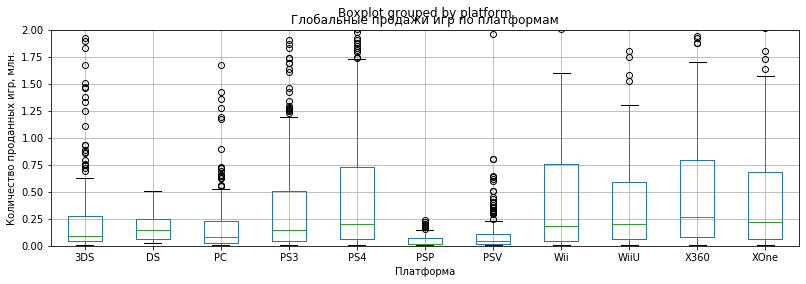

In [22]:
# построим ящики с усами для каждой платформы
actual_data.boxplot('total_sales', by='platform',figsize=(13,4))
plt.ylim(0,2)
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных игр, млн.')
plt.show()

Лидерами по продажам за актуальный период являются **PS4, PS3 и XOne**. В свою очередь, лидерами по средним продажам являются **X360, Xone, WiiU и PS4**.  
Доходы от продаж игр на DS составляют всего 0.5% от продаж игр лидера (PS4).

<a id='12-bullet'></a>
#### Влияние отзывов пользователей и критиков на продажи игр.

Рассмотрим влияние оценок критиков и пользователей на продажи на платформе-лидере актуального периода - PS4.

In [23]:
# отфильтруем данные по лидеру актуального периода 
ps4=actual_data.query('(platform == "PS4") and (critic_score != -1) and (user_score != -1)')

Коэффициент корреляции critic_score и total_sales: 0.41
Коэффициент корреляции user_score и total_sales: -0.03


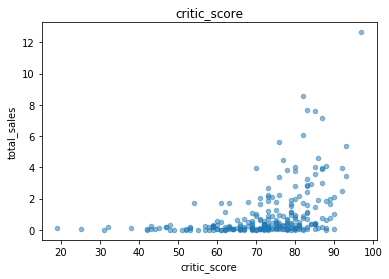

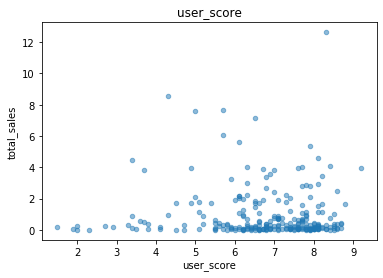

In [24]:
# посчитаем коэффициент корреляции и построим диаграмму рассеяния оценок и общих продаж
for column in ['critic_score', 'user_score']:
    print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(ps4[column].corr(ps4['total_sales']), 2)))
    ps4.plot(x=column, y='total_sales', kind='scatter', alpha=0.5)
    plt.title(column)
plt.show()

Как можно заметить коэффициент корреляции указывает на **слабую прямую взаимосвязь** между оценкой критиков и количеством продаж игры.  
В то время как оценки пользователей не влияют на продажи игры. 
  
Далее, рассмотрим другие платформы. Будет ли наблюдаться схожая взаимосязь у них? 


PS3:
Коэффициент корреляции critic_score и total_sales: 0.33
Коэффициент корреляции user_score и total_sales: 0.02


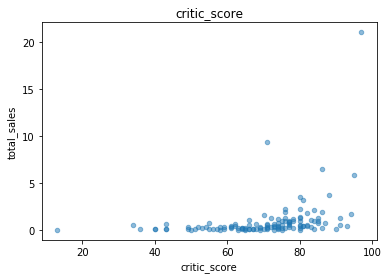

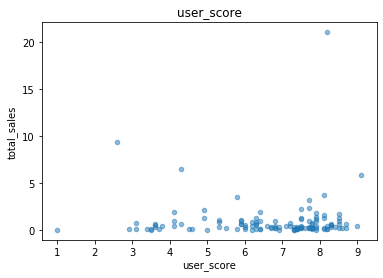


XOne:
Коэффициент корреляции critic_score и total_sales: 0.41
Коэффициент корреляции user_score и total_sales: -0.09


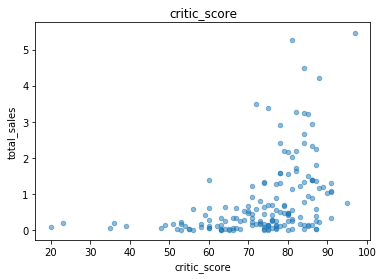

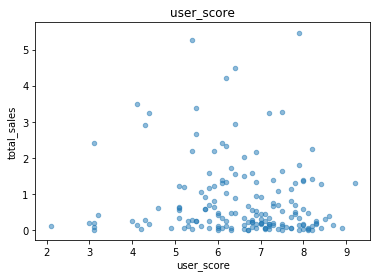


3DS:
Коэффициент корреляции critic_score и total_sales: 0.34
Коэффициент корреляции user_score и total_sales: 0.27


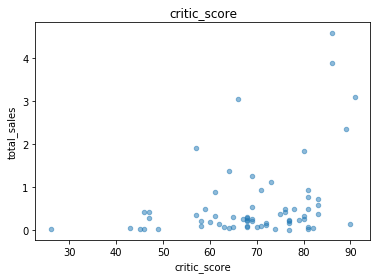

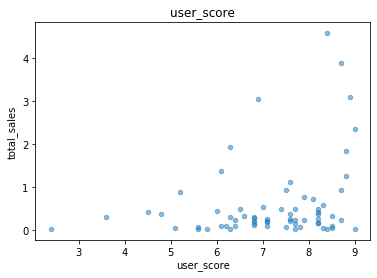


X360:
Коэффициент корреляции critic_score и total_sales: 0.35
Коэффициент корреляции user_score и total_sales: -0.01


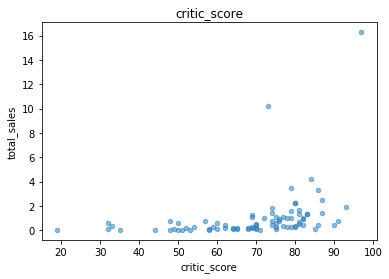

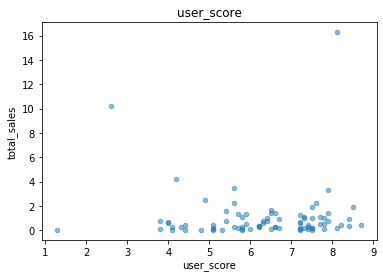


WiiU:
Коэффициент корреляции critic_score и total_sales: 0.38
Коэффициент корреляции user_score и total_sales: 0.41


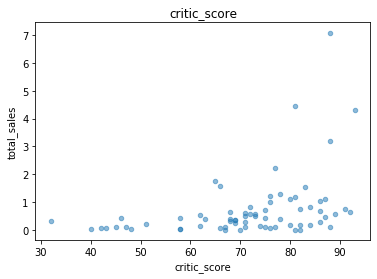

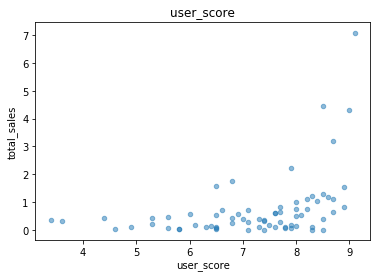

In [25]:
# посчитаем коэффициенты корреляции и построим диаграммы для других платформ
for platform in ['PS3', 'XOne', '3DS','X360', 'WiiU']:
    print('\n{0}:'.format(platform))
    for column in ['critic_score', 'user_score']:
        temp=actual_data.query('platform == @platform and (user_score != -1) and (critic_score != -1)')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(temp[column].corr(temp['total_sales']), 2)))
        temp.plot(x=column, y='total_sales', kind='scatter', alpha=0.5)
        plt.title(column)
    plt.show()

У **всех других платформ** наблюдается схожая картина как у лидера актуального периода PS4 - оценки критиков оказывают небольшое прямое влияние на продажи.  
Стоит отметить, что у **3DS и WiiU** на продажи также оказывают влияние оценки пользователей. 

<a id='13-bullet'></a>
#### Посмотрим на общее распределение игр по жанрам

In [26]:
# посчитаем общие и средние продажи за актуальный период по жанрам
genres = actual_data.pivot_table(index='genre', values='total_sales', aggfunc=['sum','median'])
genres.columns=('total_sales', 'median_sales')
genres.sort_values(by='total_sales', ascending=False)

,total_sales,median_sales
genre,,
Action,321.87,0.110
Shooter,232.98,0.450
Sports,150.65,0.240
Role-Playing,145.89,0.125
Misc,62.82,0.100
Platform,42.63,0.225
Racing,39.89,0.120
Fighting,35.31,0.125
Adventure,23.64,0.030


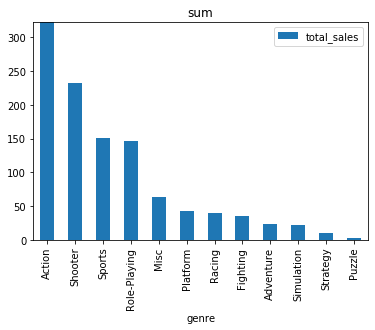

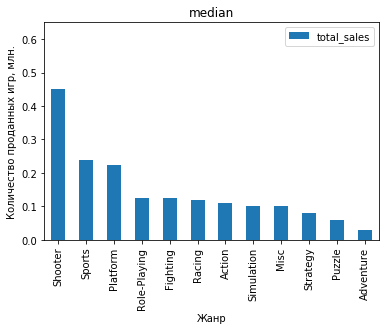

In [27]:
# построим диаграммы для глобальных и средних продаж игр по жанрам
for column in ['sum','median']:
    (actual_data
        .pivot_table(index='genre', values='total_sales', aggfunc=column)
        .sort_values('total_sales', ascending=False)
        .plot(kind='bar', ylim=(0,actual_data.pivot_table(index='genre', values='total_sales', aggfunc=column)['total_sales'].max()+0.2), title=column))
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр, млн.')
plt.show()

Можно заметить, что игры жанра **Shooter** имеют самые высокие средние продажи, но интересно, что по общим продажами они уступают  играм самого популярного жанра **Action**.  
Реже всего за актуальный период пользователи покупали **стратегии и игры головоломки (Strategy и Puzzle)**.

### Шаг 4. Портрет пользователя каждого региона

<a id='14-bullet'></a>
#### Рассмотрим самые популярные платформы в регионах

In [28]:
# посчитаем ТОП-5 платформ в каждом регионе и долю каждой из них
for column in ['na_sales', 'eu_sales','jp_sales']:
    region = actual_data.pivot_table(index='platform', values=column, aggfunc='sum').\
    sort_values(column, ascending=False)
    region['ratio']=round(region[column]/region[column].sum(),2)
    print(region.nlargest(5, column))
    print()

          na_sales  ratio
platform                 
PS4         108.74   0.25
XOne         93.12   0.21
X360         81.66   0.19
PS3          63.50   0.15
3DS          38.20   0.09

          eu_sales  ratio
platform                 
PS4         141.09   0.36
PS3          67.81   0.17
XOne         51.59   0.13
X360         42.52   0.11
3DS          30.96   0.08

          jp_sales  ratio
platform                 
3DS          67.81   0.48
PS3          23.35   0.17
PSV          18.59   0.13
PS4          15.96   0.11
WiiU         10.88   0.08



Для Северной Америки и Европы ТОП-5 платформ совпадает, существуют только различия в долях и местах в ТОП-5. В свою очередь, в Японии ТОП-5 серьезно различается.  
В Северной Америке и Европе лидирует **PS4**, а в Японии - **3DS**, которая замыкает ТОП-5 в Европе и Северной Америке. Также можно обратить внимание, что в Японии в ТОП-5 не попала ни одна версия платформы **X-box**. 

<a id='15-bullet'></a>
#### Рассмотрим самые популярные жанры игр в регионах

In [29]:
# посчитаем ТОП-5 жанров в каждом регионе и долю каждого из них
for column in ['na_sales', 'eu_sales','jp_sales']:
    region = actual_data.pivot_table(index='genre', values=column, aggfunc='sum').\
    sort_values(column, ascending=False)
    region['ratio']=round(region[column]/region[column].sum(),2)
    print(region.nlargest(5, column))
    print()

              na_sales  ratio
genre                        
Action          126.05   0.29
Shooter         109.74   0.25
Sports           65.27   0.15
Role-Playing     46.40   0.11
Misc             27.49   0.06

              eu_sales  ratio
genre                        
Action          118.13   0.30
Shooter          87.86   0.22
Sports           60.52   0.15
Role-Playing     36.97   0.09
Racing           20.19   0.05

              jp_sales  ratio
genre                        
Role-Playing     51.04   0.36
Action           40.49   0.29
Misc              9.20   0.07
Fighting          7.65   0.05
Shooter           6.61   0.05



Самый популярный жанр в Северной Америке и Европе - **Action**, в Японии он занимает второе место. ТОП-5 жанров в Северной Америке и Европе различаются только пятым местом. В Северной Америке - это **Misc**, а в Европе - **Racing**.  
В Японии больше всего любят игры жанра **РПГ (Role-Playing**), а второй по популярности жанр **Shooter** в Северной Америке и  Европе занимает только 5 место.

<a id='16-bullet'></a>
#### Рассмотрим влияет ли рейтинг ESRB на продажи в регионах

Рейтинг ESRB*: 
  - E - от 6 лет
  - E10+ - от 10 лет
  - T - от 13 лет
  - M - от 17 лет  

*Значение "-1" означает, что у игры по каким-то причинам нет рейтинга. 

,eu_sales,jp_sales,na_sales
rating,,,
-1,20.1%,60.4%,20.4%
E,21.3%,10.8%,18.1%
E10+,10.9%,4.2%,12.4%
M,37.0%,10.0%,37.7%
T,10.7%,14.6%,11.4%


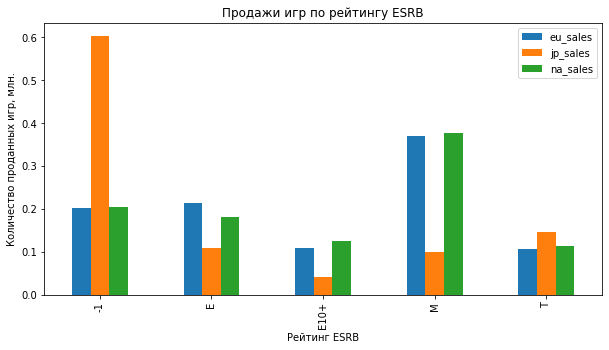

In [30]:
# посчитаем доли рейтингов ESRB по регионам
columns = ['na_sales', 'eu_sales','jp_sales']
report = actual_data.pivot_table(index='rating', values=columns, aggfunc='sum')
for col in columns:
    report[col] = report[col] / report[col].sum()
report.plot(kind = 'bar', figsize=(10,5))
plt.title('Продажи игр по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных игр, млн.')
report.style.format({'eu_sales':'{:.1%}', 'jp_sales':'{:.1%}', 'na_sales':'{:.1%}'})

Северная Америка и Европа вновь отличаются от Японии по популярности рейтингов: в Америке и Европе самый популярный рейтинг **"M" (от 17 лет)**, в то время как в Японии - рейтинг **"T" (от 13 лет)**. Второе место принадлежит одинаково во всех регионах и принадлежит рейтингу **"E" (от 6 лет)**.  
Можно заметить, что в Японии практически в 3 раза больше игр без рейтинга ESRB по сравнению с Северной Америкой и Европой. Это объясняется тем, что для Японии более актуален другой рейтинг - CERO.  

### Шаг 5. Проверка гипотез

<a id='17-bullet'></a>
#### 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H0 = средний пользовательский рейтинг платформ Xbox One и PC одинаковый  
H1 = средний пользовательский рейтинг платформ Xbox One и PC различается  
α = 5%

Перед проверкой гипотез посмотрим на дисперсии выборок, чтобы определить каким должен быть атрибут `equal_var`

Дисперсия для  XOne 12.4
Дисперсия для  PC 10.3


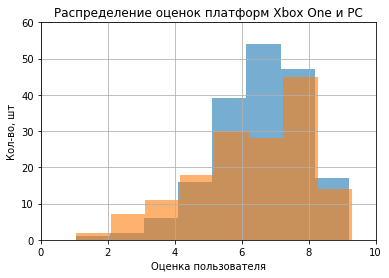

In [31]:
# посчитаем дисперсию и построим распределение
for column in ['XOne', 'PC']: 
    print('Дисперсия для ',column,round(np.var(actual_data[actual_data['platform']== column]['user_score']),1))
    actual_data[actual_data['platform']== column] ['user_score'].hist(bins=10, alpha=0.6)
    plt.title('Распределение оценок платформ Xbox One и PC')
    plt.xlim(0,10)
    plt.ylim(0,60)
    plt.xlabel('Оценка пользователя')
    plt.ylabel('Кол-во, шт')

Дисперсии платформ и распределения оценок по платформам приблизительно равны, поэтому при проверке гипотезы атрибуту `equal_var` передадим значение *True*.

In [32]:
# выделяем пользователей платформ в отдельную переменную
xone = actual_data.query('platform == "XOne"')['user_score']
pc = actual_data.query('platform == "PC"')['user_score']

alpha = .05

# проверка гипотезы
results = st.ttest_ind(
    xone,
    pc,
    equal_var=True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.20111399900783614
Не получилось отвергнуть нулевую гипотезу


In [33]:
# посмотрим на средние пользовательские оценки по платформам 
xone_pc=actual_data.query('(platform == "XOne") or (platform == "PC")')
xone_pc.pivot_table(index='platform',values='user_score', aggfunc='mean').style.format({'user_score':'{:.3}'})

,user_score
platform,
PC,4.96
XOne,4.54


У нас нет оснований отвергнуть нулевую гипотезу, а это значит, что с вероятностью 95% средний **пользовательский рейтинг игр** на платформах Xbox One и PC **не различается**. 

<a id='18-bullet'></a>
#### 2. Средние пользовательские рейтинги жанров Action и Sports разные.
H0 = средний пользовательский рейтинг жанров Action и Sports одинаковый  
H1 = средний пользовательский рейтинг жанров Action и Sports различается  
α = 5%

Перед проверкой гипотез посмотрим на дисперсии выборок, чтобы определить каким должен быть атрибут `equal_var`

Дисперсия для  Action 16.2
Дисперсия для  Sports 9.7


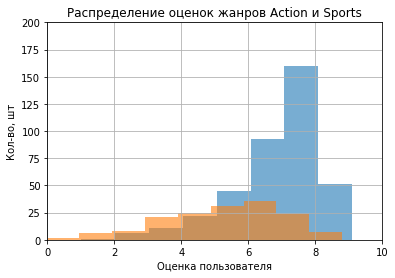

In [34]:
# посчитаем дисперсию и построим распределение
for column in ['Action', 'Sports']: 
    print('Дисперсия для ',column,round(np.var(actual_data[actual_data['genre']== column]['user_score']),1))
    actual_data[actual_data['genre']== column] ['user_score'].hist(bins=10, alpha=0.6)
    plt.title('Распределение оценок жанров Action и Sports')
    plt.xlim(0,10)
    plt.ylim(0,200)
    plt.xlabel('Оценка пользователя')
    plt.ylabel('Кол-во, шт')

Дисперсии жанров и распределения оценок по жанрам различаются, поэтому при проверке гипотезы атрибуту `equal_var` передадим значение *False*.

In [35]:
# выделяем пользователей платформ в отдельную переменную
action = actual_data.query('genre == "Action"')['user_score']
sports = actual_data.query('genre == "Sports"')['user_score']

alpha = .05

# проверка гипотезы
results = st.ttest_ind(
    action,
    sports,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.008445505365573194
Отвергаем нулевую гипотезу


In [36]:
# посмотрим на средние пользовательские оценки по жанрам 
action_sports=actual_data.query('(genre == "Action") or (genre == "Sports")')
action_sports.pivot_table(index='genre',values='user_score', aggfunc='mean').style.format({'user_score':'{:.3}'})

,user_score
genre,
Action,2.98
Sports,3.66


У нас есть основания отвергнуть нулевую гипотезу, а это значит, что мы принимаем альтернативную гипотезу. Так, с вероятностью 95% мы можем утверждать, что средний пользовательский рейтинг жанров Action и Sports различается.

<a id='19-bullet'></a>
### Шаг 6. Общий вывод

Наш анализ показал, что потенциально успешный продукт должен обладать следующими характеристиками: 
 1. Если речь идет о рынке Северной Америки или Европы, то игра должна быть разработана для **PS4 или Xbox One**. А если игру планируется продавать в Японии, то **3DS**
 2. Жанры, которые имеют больший успех у аудитории Северной Америки и Европы - это **Action** или **Shooter**. В Японии - **Role-Playing**.  
 3. Для Северной Америки и Европы лучше создавать игру с рейтингом ESRB **от 17 лет (M)**, а для Японии - **от 13 лет (T)**.
 4. Оценки пользователей не оказывает никакого влияния на продажи. **Оценки критиков** в свою очередь оказывают небольшое **положительное влияние** на продажи. Также стоит отметить, что если оценки пользователей всё-таки будут важны издателям, и он будет выбирать между производством Action игры или спортивной игры, то лучше остановиться на **спортивной игре** - её пользовательские оценки вероятно окажутся **выше**. 